### Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Silky Afina Saly
- **Email:** mc820d5x0376@student.devacademy.id
- **ID Dicoding:** MC820D5X0376

### Menentukan Pertanyaan Bisnis
- Bagaimana pengaruh weekday, working day, dan holiday terhadap jumlah penyewaan sepeda?
- Bagaimana kondisi cuaca (suhu, kelembapan, dan kecepatan angin) mempengaruhi jumlah penyewaan sepeda?

### Import Semua Packages / Library yang digunakan

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st
import os

### Data Wrangling

### Gathering Data

In [5]:
day_df = pd.read_csv("Data/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight Data Penyewaan Sepeda per Hari:**
- Dataset ini mencerminkan tren harian penyewaan sepeda.
- Kolom weekday: Hari dalam seminggu (0 = Minggu, 6 = Sabtu).
- Kolom workingday: 1 jika hari kerja, 0 jika akhir pekan/hari libur.
- Kolom holiday: 1 jika hari libur, 0 jika bukan.
- Kolom season, holiday, weekday, workingday dapat digunakan untuk melihat pola penyewaan berdasarkan hari kerja atau akhir pekan.
- Kolom weathersit: Kategori kondisi cuaca (1 = cerah, 4 = hujan/salju lebat).
- Kolom temp: Suhu (ternormalisasi, perlu dikonversi ke skala sebenarnya).
- Kolom hum: Kelembapan udara (dalam skala 0-1, perlu dikali 100 untuk persen).
- Kolom windspeed: Kecepatan angin (ternormalisasi, perlu dikonversi ke skala sebenarnya).
- Kolom weathersit, temp, hum, windspeed bisa digunakan untuk melihat pengaruh cuaca.
- Kolom casual: Pengguna tidak terdaftar (pengguna biasa).
- Kolom registered: Pengguna terdaftar.
- Kolom cnt: Total penyewaan sepeda (casual + registered).

In [6]:
hour_df = pd.read_csv("Data/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight Data Penyewaan Sepeda per Jam:**
- Dataset ini merekam penyewaan sepeda per jam: Ada kolom hr (jam 0-23) yang menunjukkan kapan data diambil.
- Kolom weekday: Hari dalam seminggu (0 = Minggu, 6 = Sabtu).
- Kolom workingday: 1 jika hari kerja, 0 jika akhir pekan/hari libur.
- Kolom holiday: 1 jika hari libur, 0 jika bukan.
- Kolom weathersit: Kategori kondisi cuaca (1 = cerah, 4 = hujan/salju lebat).
- Kolom temp: Suhu (ternormalisasi, perlu dikonversi ke skala sebenarnya).
- Kolom hum: Kelembapan udara (dalam skala 0-1, perlu dikali 100 untuk persen).
- Kolom windspeed: Kecepatan angin (sudah ternormalisasi)
- Kolom casual: Pengguna tidak terdaftar (pengguna biasa).
- Kolom registered: Pengguna terdaftar.
- Kolom cnt: Total penyewaan sepeda (casual + registered).

### Assessing Data

### Tabel `day_df`

In [4]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [5]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [6]:
day_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [7]:
day_df.duplicated().sum()

np.int64(0)

**Insight:**
- Data sudah siap digunakan untuk analisis karena tidak ada missing value dan duplikat.
- Kolom dteday memiliki tipe data object, sehingga harus diperbaiki agar dapat melakukan analisis dengan mudah.

### Cleaning Data

In [9]:
day_df['dteday'] = pd.to_datetime(day_df['dteday'])

**Insight:**
- Dengan format datetime yang benar pada kolom dteday, kita bisa melakukan analisis tren waktu lebih mudah.

### Tabel `hour_df`

In [ ]:
hour_df.info()

In [ ]:
hour_df.describe()

In [ ]:
hour_df.isnull().sum()

In [ ]:
day_df.duplicated().sum()

**Insight:**
- Data sudah siap digunakan untuk analisis karena tidak ada missing value dan duplikat.
- Kolom dteday memiliki tipe data object, sehingga harus diperbaiki agar dapat melakukan analisis dengan mudah.

### Cleaning Data

In [ ]:
hour_df['dteday'] = pd.to_datetime(day_df['dteday'])

**Insight:**
- Dengan format datetime yang benar pada kolom dteday, kita bisa melakukan analisis tren waktu lebih mudah.

## Exploratory Data Analysis (EDA)

### Explore `day_df`

In [5]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2012-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


In [7]:
day_df.groupby("weekday")["cnt"].sum()

weekday
0    444027
1    455503
2    469109
3    473048
4    485395
5    487790
6    477807
Name: cnt, dtype: int64

In [9]:
day_df.groupby("weathersit").agg({"cnt": ["mean", "sum"]})

cnt         
                   mean      sum
weathersit                      
1           4876.786177  2257952
2           4035.862348   996858
3           1803.285714    37869

In [10]:
day_df.groupby("temp").agg({"cnt": ["mean", "sum"]})

cnt      
            mean   sum
temp                  
0.059130   981.0   981
0.096522   986.0   986
0.097391  1416.0  1416
0.107500  2368.0  2368
0.127500  1529.0  1529
...          ...   ...
0.834167  5463.0  5463
0.838333  3846.0  3846
0.848333  3387.0  3387
0.849167  3285.0  3285
0.861667  4840.0  4840

[499 rows x 2 columns]

In [11]:
day_df.groupby("atemp").agg({"cnt": ["mean", "sum"]})

cnt      
            mean   sum
atemp                 
0.079070   981.0   981
0.098839   986.0   986
0.101658  1529.0  1529
0.116175   822.0   822
0.117930  1416.0  1416
...          ...   ...
0.794829  3606.0  3606
0.804287  3285.0  3285
0.804913  4840.0  4840
0.826371  3784.0  3784
0.840896  3387.0  3387

[690 rows x 2 columns]

In [12]:
day_df.groupby("hum").agg({"cnt": ["mean", "sum"]})

cnt      
            mean   sum
hum                   
0.000000   623.0   623
0.187917  1635.0  1635
0.254167  6857.0  6857
0.275833  5169.0  5169
0.290000  5102.0  5102
...          ...   ...
0.948261   605.0   605
0.949583  2594.0  2594
0.962500  1607.0  1607
0.970417   705.0   705
0.972500  2395.0  2395

[595 rows x 2 columns]

In [13]:
day_df.groupby("windspeed").agg({"cnt": ["mean", "sum"]})

cnt      
             mean   sum
windspeed              
0.022392   4985.0  4985
0.042304   5117.0  5117
0.045404   5409.0  5409
0.045408   1712.0  1712
0.046650   5087.0  5087
...           ...   ...
0.417908   1913.0  1913
0.421642   2732.0  2732
0.422275   4195.0  4195
0.441563   5382.0  5382
0.507463   1635.0  1635

[650 rows x 2 columns]

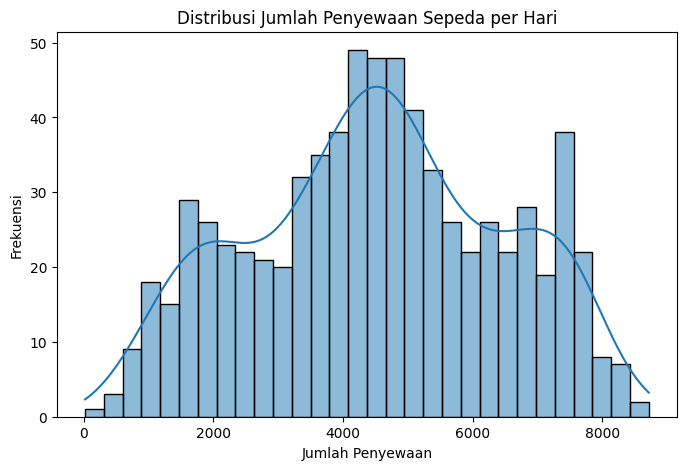

In [23]:
plt.figure(figsize=(8,5))
sns.histplot(day_df['cnt'], bins=30, kde=True)
plt.title("Distribusi Jumlah Penyewaan Sepeda per Hari")
plt.xlabel("Jumlah Penyewaan")
plt.ylabel("Frekuensi")
plt.show()

**Insight Data Penyewaan Sepeda per hari:**
- Data penyewaan sepeda cukup terdistribusi normal dengan sedikit skewness ke kanan, yang berarti ada beberapa hari dengan penyewaan sangat tinggi. Namun, distribusi masih cukup simetris, jadi transformasi log tidak terlalu diperlukan.
- Tidak ada indikasi outlier ekstrem yang perlu dihilangkan.
- Distribusi terlihat cukup normal (mendekati distribusi Gaussian) dengan sedikit skewness ke kanan. Ini berarti mayoritas jumlah penyewaan berkisar antara 2000 hingga 6000, dengan puncak sekitar 4000-5000. Ada beberapa nilai ekstrem di sisi kanan (8000+), tapi tidak terlalu jauh dari distribusi utama, sehingga masih wajar.
- Distribusi ini bisa digunakan langsung untuk analisis tanpa perlu transformasi data.

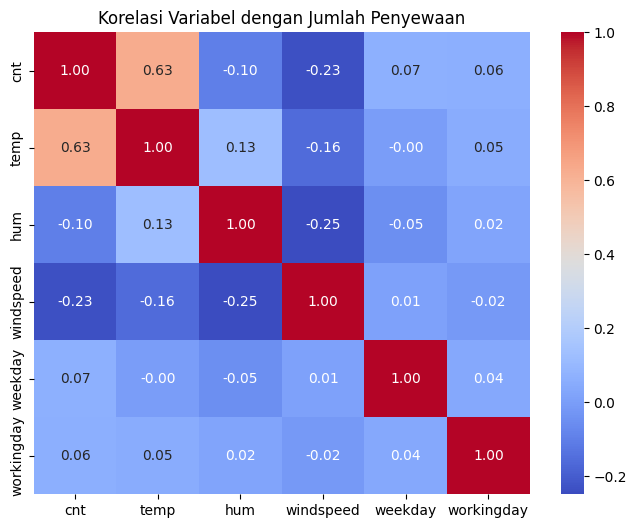

In [26]:
plt.figure(figsize=(8,6))
sns.heatmap(day_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Korelasi Variabel dengan Jumlah Penyewaan")
plt.show()

**Insight:**
- Suhu (temp) memiliki korelasi positif yang cukup kuat (0.63), artinya semakin tinggi suhu, semakin banyak sepeda yang disewa.
- Kelembapan (hum) memiliki korelasi negatif lemah (-0.10), artinya semakin tinggi kelembapan, penyewaan cenderung sedikit menurun. Namun, dampaknya kecil karena nilai korelasinya dekat dengan 0.
- Kecepatan angin (windspeed) memiliki korelasi negatif sedang (-0.23), artinya semakin tinggi kecepatan angin, semakin sedikit sepeda yang disewa.
- Hari dalam seminggu (weekday) memiliki korelasi sangat lemah (0.07), menunjukkan bahwa jumlah penyewaan tidak terlalu dipengaruhi oleh hari dalam seminggu.
- Hari kerja (working day) memiliki korelasi sangat lemah (0.06), menunjukkan bahwa jumlah penyewaan tidak jauh berbeda antara hari kerja dan hari libur.

### Explore `hour_df`

In [8]:
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2012-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,NaN,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,NaN,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000


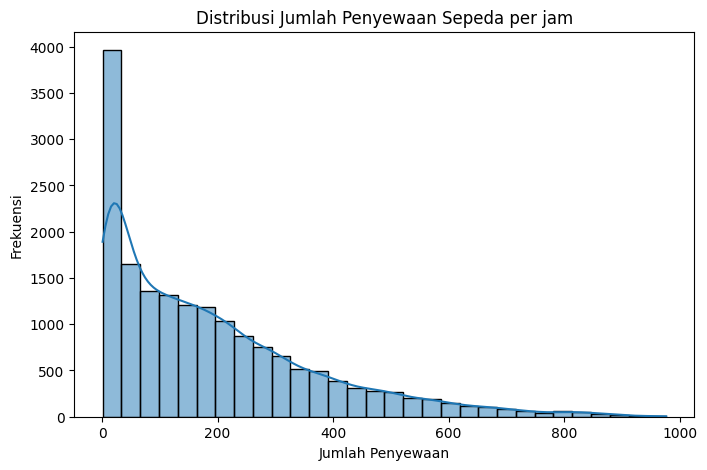

In [22]:
plt.figure(figsize=(8,5))
sns.histplot(hour_df['cnt'], bins=30, kde=True)
plt.title("Distribusi Jumlah Penyewaan Sepeda per jam")
plt.xlabel("Jumlah Penyewaan")
plt.ylabel("Frekuensi")
plt.show()

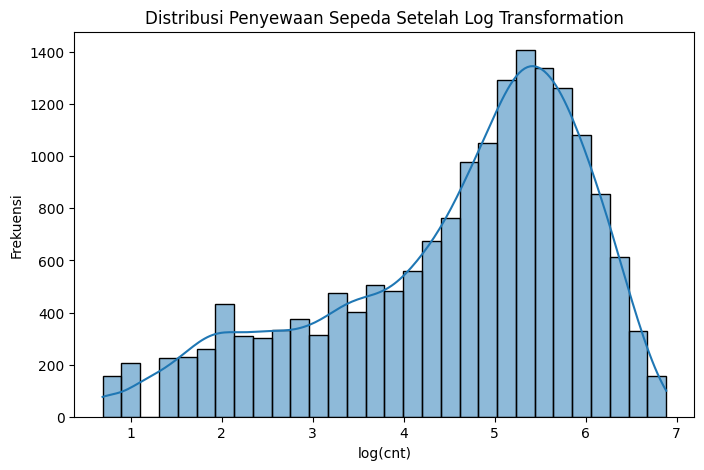

In [11]:
hour_df["cnt_log"] = np.log1p(hour_df["cnt"])
plt.figure(figsize=(8,5))
sns.histplot(hour_df["cnt_log"], bins=30, kde=True)
plt.title("Distribusi Penyewaan Sepeda Setelah Log Transformation")
plt.xlabel("log(cnt)")
plt.ylabel("Frekuensi")
plt.show()

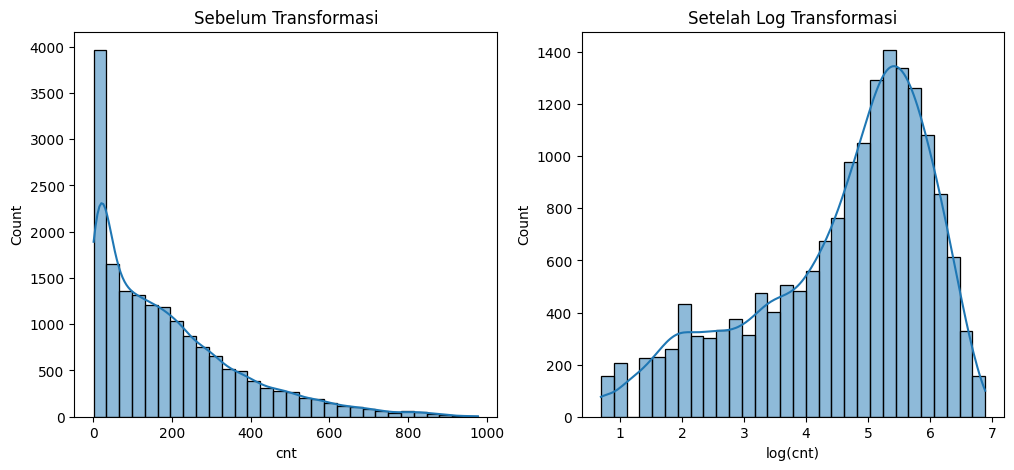

In [13]:
fig, axes = plt.subplots(1, 2, figsize=(12,5))

sns.histplot(hour_df["cnt"], bins=30, kde=True, ax=axes[0])
axes[0].set_title("Sebelum Transformasi")
axes[0].set_xlabel("cnt")

sns.histplot(hour_df["cnt_log"], bins=30, kde=True, ax=axes[1])
axes[1].set_title("Setelah Log Transformasi")
axes[1].set_xlabel("log(cnt)")

plt.show()


**Insight Data Penyewaan Sepeda per jam:**
- Histogram awal menunjukkan distribusi yang sangat right-skewed (positively skewed). Sebagian besar data berada di angka yang rendah (banyak penyewaan di bawah 200), dan semakin besar jumlah penyewaan, semakin jarang kemunculannya.
- Setelah dilakukan transformasi menggunakan log, distribusi data menjadi lebih normal.

In [14]:
def categorize_hour(hour):
    if 6 <= hour < 12:
        return 'Pagi'
    elif 12 <= hour < 18:
        return 'Siang'
    elif 18 <= hour < 24:
        return 'Malam'
    else:
        return 'Dini Hari'

hour_df['time_of_day'] = hour_df['hr'].apply(categorize_hour)

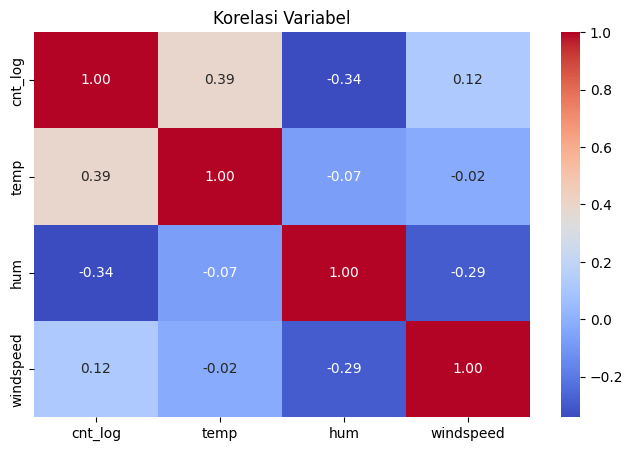

In [15]:
correlation_matrix = hour_df[['cnt_log', 'temp', 'hum', 'windspeed']].corr()
plt.figure(figsize=(8,5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Korelasi Variabel")
plt.show()

**Insight:**
- Suhu (temp) memiliki korelasi positif lemah(0.39) dengan jumlah penyewaan sepeda. Artinya, semakin tinggi suhu, cenderung semakin banyak sepeda yang disewa.
- Kelembapan (hum) memiliki korelasi negatif sedang (-0.34) dengan jumlah penyewaan. Artinya, semakin lembap udara, semakin sedikit sepeda yang disewa. Ini masuk akal karena kondisi lembap mungkin membuat orang kurang nyaman untuk bersepeda.
- Kecepatan angin (windspeed) hampir tidak memiliki hubungan yang kuat dengan jumlah penyewaan sepeda. Mungkin karena angin tidak terlalu berdampak besar pada keputusan orang untuk menyewa sepeda.

## Visualization & Explanatory Analysis

### Bagaimana pengaruh weekday, working day, dan holiday terhadap jumlah penyewaan sepeda?

C:\Users\User\AppData\Local\Temp\ipykernel_15672\563182576.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='workingday', y='cnt', data=day_df, estimator=sum, ci=None)


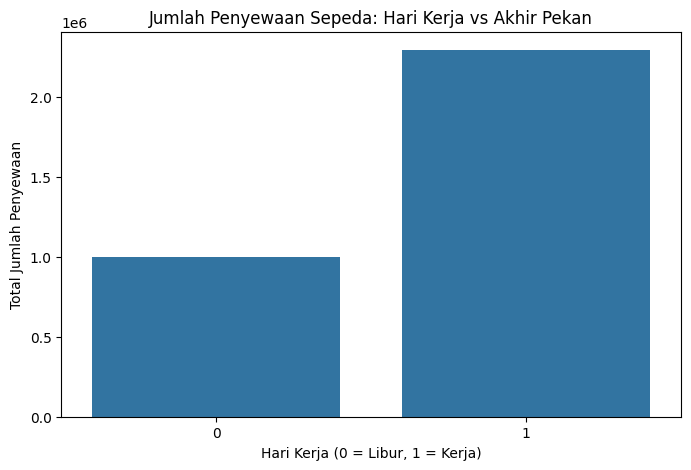

In [14]:
plt.figure(figsize=(8, 5))
sns.barplot(x='workingday', y='cnt', data=day_df, estimator=sum, ci=None)

plt.title("Jumlah Penyewaan Sepeda: Hari Kerja vs Akhir Pekan")
plt.xlabel("Hari Kerja (0 = Libur, 1 = Kerja)")
plt.ylabel("Total Jumlah Penyewaan")
plt.show()

**Insight:**
- Bar card menunjukkan bahwa jumlah penyewaan sepeda lebih tinggi pada hari kerja (1) dibandingkan akhir pekan (0). Ini menunjukkan bahwa sepeda lebih banyak digunakan untuk keperluan transportasi harian, seperti pergi ke kantor atau sekolah, daripada untuk rekreasi di akhir pekan.
- Meskipun lebih rendah dibanding hari kerja, penyewaan sepeda di akhir pekan tetap cukup tinggi. Ini menunjukkan bahwa sepeda masih digunakan untuk aktivitas santai atau rekreasi, meskipun tidak seintensif di hari kerja.

C:\Users\User\AppData\Local\Temp\ipykernel_20324\3217267485.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='weekday', y='cnt', data=day_df, estimator=sum, palette="viridis")


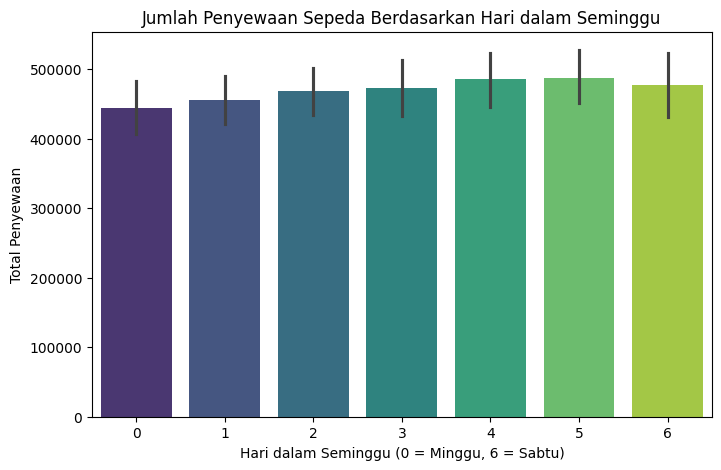

In [28]:
plt.figure(figsize=(8,5))
sns.barplot(x='weekday', y='cnt', data=day_df, estimator=sum, palette="viridis")
plt.title("Jumlah Penyewaan Sepeda Berdasarkan Hari dalam Seminggu")
plt.xlabel("Hari dalam Seminggu (0 = Minggu, 6 = Sabtu)")
plt.ylabel("Total Penyewaan")
plt.show()

**Insight:**
- Bar card penyewaan sepeda per hari dalam seminggu cukup stabil, dengan adanya sedikit angka variasi antarhari. Tidak ada perbedaan yang terlalu mencolok antara hari kerja dan akhir pekan, yang berarti penyewaan tidak hanya terjadi karena commuting ke kantor/sekolah tetapi juga untuk aktivitas lainnya.

### Bagaimana kondisi cuaca (suhu, kelembapan, dan kecepatan angin) mempengaruhi jumlah penyewaan sepeda?

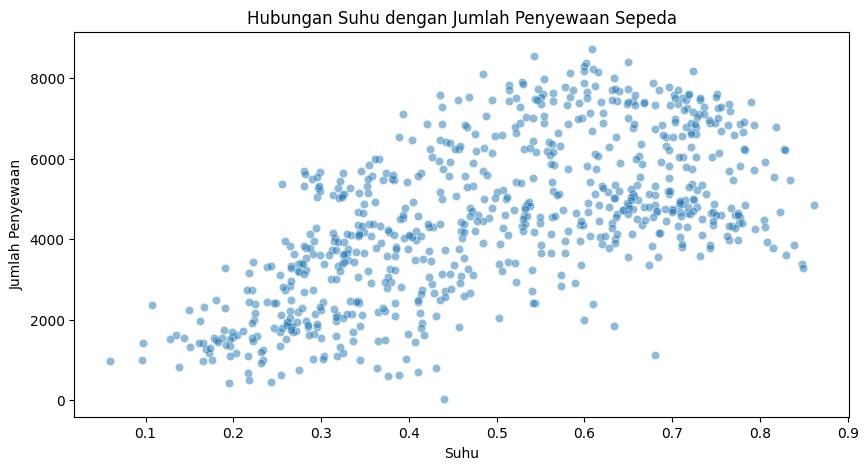

In [29]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='temp', y='cnt', data=day_df, alpha=0.5)
plt.title("Hubungan Suhu dengan Jumlah Penyewaan Sepeda")
plt.xlabel("Suhu")
plt.ylabel("Jumlah Penyewaan")
plt.show()

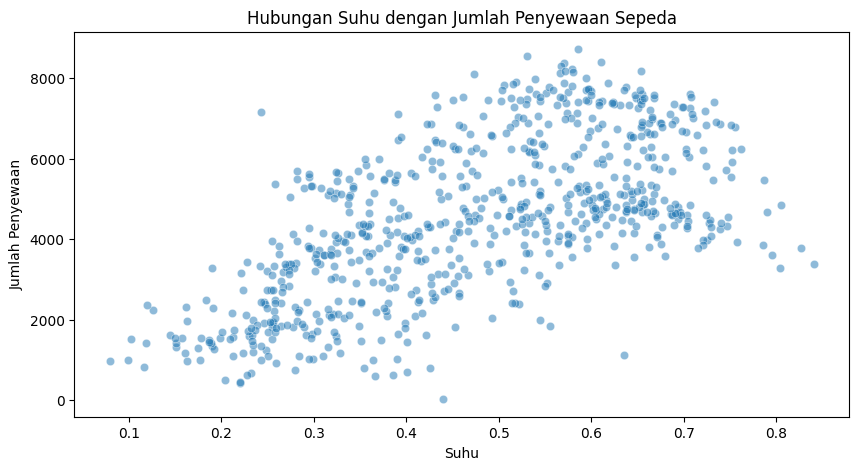

In [15]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='atemp', y='cnt', data=day_df, alpha=0.5)
plt.title("Hubungan Suhu dengan Jumlah Penyewaan Sepeda")
plt.xlabel("Suhu")
plt.ylabel("Jumlah Penyewaan")
plt.show()

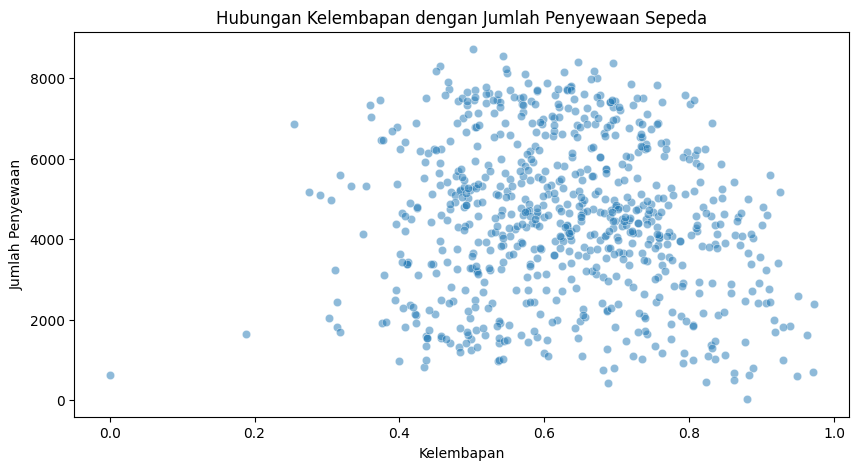

In [30]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='hum', y='cnt', data=day_df, alpha=0.5)
plt.title("Hubungan Kelembapan dengan Jumlah Penyewaan Sepeda")
plt.xlabel("Kelembapan")
plt.ylabel("Jumlah Penyewaan")
plt.show()

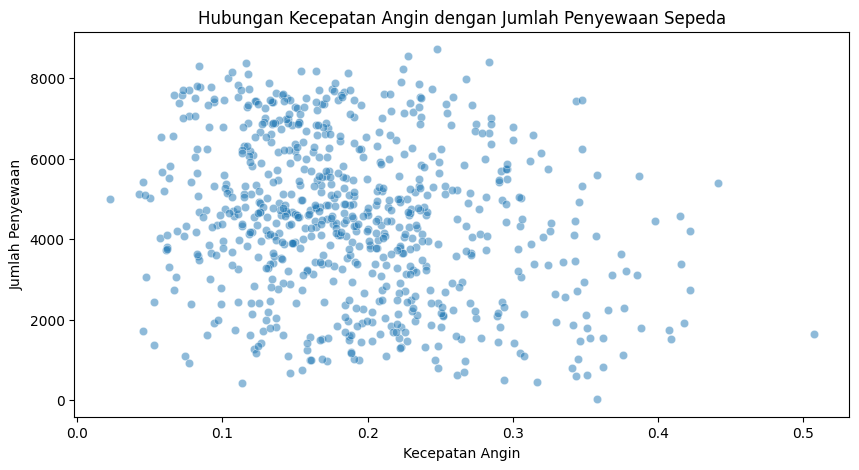

In [18]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='windspeed', y='cnt', data=day_df, alpha=0.5)
plt.title("Hubungan Kecepatan Angin dengan Jumlah Penyewaan Sepeda")
plt.xlabel("Kecepatan Angin")
plt.ylabel("Jumlah Penyewaan")
plt.show()

**Insight Pengaruh suhu, kelembapan, dan kecepatan angin terhadap jumlah penyewaan sepeda:**
- Scatter plot pengaruh suhu menghasilkan korelasi positif, dimana semakin tinggi suhu, semakin banyak sepeda yang disewa. Ini bisa disebabkan oleh kenyamanan bersepeda saat suhu sedang hangat.
- Scatter plot kelembapan tidak menghasilkan pola yang jelas antara kelembapan dan penyewaan sepeda. Bisa jadi faktor kelembapan tidak terlalu mempengaruhi keputusan orang untuk menyewa sepeda.
- Scatter plot kecepatan angin tidak menghasilkan pola hubungan yang jelas antara kecepatan angin dan jumlah penyewaan sepeda. Artinya, jumlah penyewaan sepeda tetap tinggi meskipun kecepatan angin bervariasi.
- Suhu berpengaruh cukup besar terhadap jumlah penyewaan, sementara kelembapan dan kecepatan angin tidak menunjukkan hubungan yang kuat.


### Conclusion

**Berdasarkan analisis data penyewaan sepeda, berikut beberapa temuan utama yang diperoleh:**

- **Pengaruh weekday, working day, dan holiday terhadap Penyewaan Sepeda:**
  - Jumlah penyewaan sepeda pada hari kerja lebih tinggi dibandingkan akhir pekan. Ini menunjukkan bahwa banyak pengguna menggunakan sepeda sebagai sarana transportasi utama, kemungkinan besar untuk keperluan commuting (perjalanan ke tempat kerja atau sekolah).
  - Perbedaan jumlah penyewaan cukup signifikan, dengan jumlah penyewaan pada hari kerja hampir dua kali lipat dibandingkan akhir pekan. Hal ini mengindikasikan bahwa permintaan sepeda lebih tinggi saat hari kerja dibandingkan saat hari libur.
  - Meskipun lebih rendah, penyewaan sepeda tetap ada di akhir pekan, yang menunjukkan bahwa selain untuk transportasi harian, sepeda juga digunakan untuk aktivitas rekreasi atau keperluan lain di luar jam kerja.
  - Hari kerja memiliki dampak signifikan terhadap jumlah penyewaan sepeda.
- **Pengaruh suhu, kelembapan, dan kecepatan angin terhadap Penyewaan Sepeda:**
  - Terdapat korelasi positif antara suhu (temp) dengan jumlah penyewaan (cnt), yang berarti semakin tinggi suhu, semakin banyak sepeda yang disewa. Hal ini mengindikasikan bahwa cuaca yang lebih hangat lebih mendorong orang untuk menggunakan sepeda.
  - Tidak ada hubungan yang kuat antara kelembapan (hum) dan jumlah penyewaan sepeda. Ini menunjukkan bahwa pengguna sepeda tidak terlalu terpengaruh oleh kelembapan dalam keputusannya untuk menyewa sepeda.
  - Suhu memiliki korelasi yang cukup tinggi dengan jumlah penyewaan sepeda, sementara kecepatan angin dan kelembapan memiliki hubungan yang lebih lemah.
- **Saran dan Implikasi:**
  - Operator layanan penyewaan sepeda dapat mempertimbangkan strategi promosi berdasarkan cuaca, misalnya memberikan diskon di  hari-hari dengan suhu lebih dingin.
  - Menawarkan insentif atau membership untuk customer agar tetap menggunakan layanan.
  - Memberikan diskon atau free trial bagi new customer untuk meningkatkan retensi mereka.
  - Mengirimkan email atau notifikasi untuk pelanggan yang jarang datang agar mereka kembali menyewa sepeda.
  - Memberikan paket harga yang lebih menarik bagi pengguna setia.


In [13]:
folder_path = "Data/"  

# Ambil semua file CSV dalam folder
csv_files = [file for file in os.listdir(folder_path) if file.endswith('.csv')]

# Gabungkan semua file CSV menjadi satu DataFrame
all_data = pd.concat([pd.read_csv(os.path.join(folder_path, file)) for file in csv_files], ignore_index=True)

# Simpan hasilnya ke file CSV baru
all_data.to_csv("Dashboard/all_data.csv", index=False)